# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

### Réponse :

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv")

In [3]:
# Verfication de l'importation des données
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [4]:
# Statistiques rapide
df.describe()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

### Réponse :

In [5]:
# Dimension du Dataframe
shape = df.shape

print(f"Nous avons {shape[0]} observations")

Nous avons 9582 observations


In [6]:
# Compter les valeurs manquantes
count_nan = df.isnull().sum()

print('Nombres des valeurs manquantes présentes : \n' + str(count_nan))

Nombres des valeurs manquantes présentes : 
Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


In [7]:
# Nombre total des valeurs manquantes  
# count_nan.sum()

print("Le nombre total des valeurs manquantes est :"  , count_nan.sum())

Le nombre total des valeurs manquantes est : 130


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

### Réponse :

In [8]:
# information sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


In [9]:
# information complémentaire 
df.nunique(axis=0)

Entreprise      1382
Metier             4
Technologies      57
Diplome            4
Experience        21
Ville             14
dtype: int64

In [115]:
print("Les metiers qui existent sont :")
print(df['Metier'].unique())

Les metiers qui existent sont :
['Data scientist' 'Data architecte' 'Lead data scientist' 'Data engineer'
 nan]


In [117]:
print("Le nombre de profil pour chaque métier :")

print(df['Metier'].value_counts())

Le nombre de profil pour chaque métier 
Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: Metier, dtype: int64


In [119]:
# Affichage de la variable Expérience

df.Experience.head()

0    1.000000
1    3.000000
2    3.000000
3    1.500000
4    2.243282
Name: Experience, dtype: float64

- Nous pouvons remarquer que le type des valeurs dans la colonne Experience, sont de type str , et cela necessite une conversion en float, en changeant aussi en amont la virgule en point.

In [13]:
# nettoyage de la variable Expérience 
df['Experience'] = df['Experience'].str.replace(',' , '.') 
# df['Experience'] = df['Experience'].apply(lambda x: x.replace("," , "."))

# Conversion en float 
df['Experience'] = df['Experience'].astype(float)

In [121]:
# Vefication du Dataframe après netoyage et conversion

print("Data frame après  netoyage et conversion de la varibale Entreprise")
df.head()

Data frame après  netoyage et conversion de la varibale Entreprise


,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.000000,Paris,Débutant
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.000000,Marseille,Débutant
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.000000,Nantes,Débutant
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.500000,Marseille,Débutant
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,2.243282,Bordeaux,Débutant


##### Etape d'mputation :

In [17]:
# Condition de filter(mask), pour les Data Engieers et les Data scientists
cond_dataEng = (df['Metier'] == 'Data engineer')
cond_dataSci = (df['Metier'] == 'Data scientist')


In [18]:
# Imputation
df.loc[cond_dataSci,'Experience'] = df.loc[cond_dataSci,'Experience'].fillna(df.loc[cond_dataSci,'Experience'].mean())
df.loc[cond_dataEng,'Experience'] = df.loc[cond_dataEng,'Experience'].fillna(df.loc[cond_dataEng,'Experience'].median())


In [19]:
# Verification d'imputation pour les data scientists
df.loc[cond_dataSci,'Experience'].isnull().sum()

0

In [20]:
# Verification d'imputation pour les data engineers
df.loc[cond_dataEng,'Experience'].isnull().sum()

0

In [124]:
# Nombre des variables manqantes pour la variable expérience 
vars_na = df.Experience.isnull().sum()
print(f"Nous avons {vars_na} variables manquantes, en total dans le dataframe")

Nous avons 42 variables manquantes, en total dans le dataframe


-  Remarque : Imputation pour le reste a voir

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

### Réponse :

- 1er idée: de faire un filter de chaque profil puis calculer la moyenne des années d'expérience.

- 2 eme idée: c'est de regrouper par metier, puis rajouter une une fonction d'aggregation qui calcule la moyene des années d'expérience

In [125]:
#2ème idée
moyenne_exp_par_metier = df.groupby('Metier').agg({'Experience':'mean'})
moyenne_exp_par_metier

,Experience
Metier,
Data architecte,3.000476
Data engineer,2.980827
Data scientist,2.243282
Lead data scientist,3.965261


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

### Réponse :

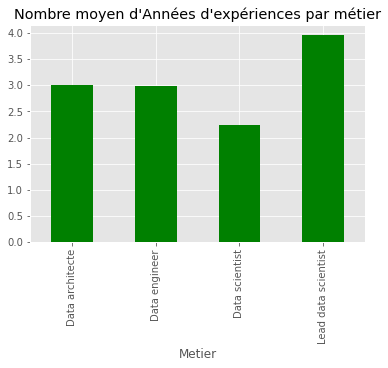

In [126]:
# Representation du nombre moye d'années d'expériences pour chaque métier
moyenne_exp_par_metier.plot.bar(title = "Nombre moyen d'Années d'expériences par métier", 
                                 color = 'green',
                                 legend = False)
plt.show()

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

### Réponse :

- Transformation de la varibale Experience en 4 modalité, Débutant, confirmé, avancé, expert

- 1 er idéee naive: On peut se baser sur une plateforme de recrutement, puis faire la categorisation a la main.
  Ce qui revient à dire que pour un débutant, il a moins de 2 ans d'experience, confirmé à entre 3 à 5 ans; avancé entre 5 et 8   
   un expert à plus de 8 ans d'éxperience.
   
- 2ème idée: faire une étude de cette population (échantillonage)
    c'est à dire étudier la population et faire une prédiction des modalités demandé

- Autrement, faire cut de pandas, qui va categoriser en 4 variables, par (bins)

In [128]:
df.Experience.count()


9540

In [27]:
Exp_label = pd.cut(df['Experience'], bins=4, labels=("Débutant", "Confirmé", "Avancé", "Expert"))
df["Exp_label"] = pd.Series(Exp_label, index=df.index)

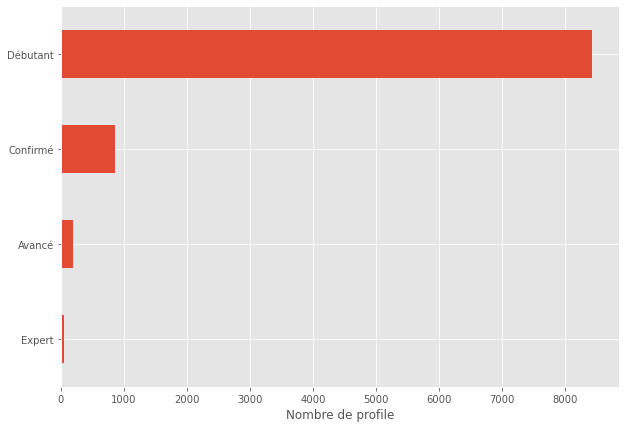

In [28]:
# Affichage des résultats
ax = pd.Series(df['Exp_label'].value_counts().values, index=df['Exp_label'].value_counts().keys()).plot.barh(figsize=(10,7))
#add_percentge(ax, x=+10.5, y=0.25) 
plt.xlabel("Nombre de profile")
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax.invert_yaxis()

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

### Réponse :

- Remarque : La variable Technologie, peut necessiter un nettoyage, et faire attention a divers terme de la meme technologie, par exemple (scikit-learn et sklearn).

In [129]:
# la serie technologies 
technologies_serie = df.Technologies

In [32]:
# Verification, s'il y 'a un employé avec une seule technologie, 
# C'est utile de vérifé au cas ou, nous avons besoin de rajouter des conditions dans la cellule suivante.

res = re.compile(r'/')
for technos in technologies_serie:
    if not res.findall(technos):
        print('Il un au moins un employé avec une seule technologie')

In [33]:
# Stockage des technologies dans un dictionnaire
stock_techs = dict()
for technos in technologies_serie:       
    for tech in technos.split('/'):
        if tech in stock_techs.keys():
            stock_techs[tech] += 1
        else:
            stock_techs[tech] = 1

In [34]:
# Trie des technologies par ordre croissant
sorted_ = sorted(stock_techs.items(), key=lambda x:x[1], reverse=True)

In [131]:
# Les 5 technologies les plus utilisés sont :

print("Les 5 technologies les plus utilisés sont :")
Top_5_technologies = dict(sorted_[:5])
Top_5_technologies.keys()

Les 5 technologies les plus utilisés sont :


dict_keys(['Python', 'R', 'SQL', 'Java', 'Hadoop'])

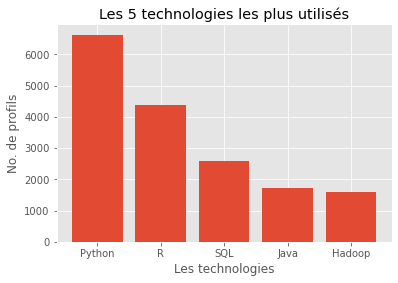

In [132]:
plt.bar(list(Top_5_technologies.keys()), list(Top_5_technologies.values()))
plt.xlabel("Les technologies")
plt.ylabel("No. de profils")
plt.title("Les 5 technologies les plus utilisés")
plt.show()

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### Réponse :

- Remarque : Puisque nous savons le nombre de cluster, nous pouvons utiliser KMeans, algorithme beaucoup utilisé pour faire du clustering, ici nous avons K=2


In [133]:
# import de librairie du pretraitement
from sklearn import preprocessing

- Nous avons besoin des pipelines d'encodage_transformation pour nos variables
     Ainsi réaliser un dataframe, contenant les variables encodées et transformées.

##### Pretraitement des données

In [41]:
# Le label encoder 
encoder_label = preprocessing.LabelEncoder()

# La variable expérience, n'a pas besoin de transformation, puisqu'elle est déjà de type numérique.
df_for_process = df.loc[:,['Experience']]

In [42]:
# encodage et transformation des variables
df_for_process['villes_encod'] = pd.Series(encoder_label.fit_transform(np.squeeze(df.loc[:,['Ville']])[:]), index = df_for_process.index)
#df_for_process['Metier_encod'] = pd.Series(encoder_label.fit_transform(np.squeeze(df.loc[:,['Metier']])[:]), index = df_for_process.index)
df_for_process['Technologies_encod'] = pd.Series(encoder_label.fit_transform(np.squeeze(df.loc[:,['Technologies']])[:]), index = df_for_process.index)
df_for_process['Diplome_encod'] = pd.Series(encoder_label.fit_transform(np.squeeze(df.loc[:,['Diplome']])[:]), index = df_for_process.index)
df_for_process['Exp_label_encod'] = pd.Series(encoder_label.fit_transform(np.squeeze(df.loc[:,['Exp_label']])[:]), index = df_for_process.index)

In [43]:
print('Le résultat obtenu après le pré-traitement de nos variables')
df_for_process

Le résultat obtenu après le pré-traitement de nos variables


,Experience,villes_encod,Technologies_encod,Diplome_encod,Exp_label_encod
0,1.000000,8,27,1,2
1,3.000000,4,34,1,2
2,3.000000,6,51,1,2
3,1.500000,4,2,1,2
4,2.243282,0,26,3,2
...,...,...,...,...,...
9577,1.500000,3,1,1,2
9578,11.000000,13,9,1,0
9579,1.000000,8,48,1,2
9580,17.000000,9,37,1,3


In [44]:
# Information sur le resultat du dataframe obtenu 
df_for_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          9540 non-null   float64
 1   villes_encod        9582 non-null   int32  
 2   Technologies_encod  9582 non-null   int32  
 3   Diplome_encod       9582 non-null   int32  
 4   Exp_label_encod     9582 non-null   int32  
dtypes: float64(1), int32(4)
memory usage: 224.7 KB


####  Etape du Clustering

In [45]:
# Importation des librairies pour les KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [46]:
# Module importé pour l'imputation des variables manquantes
from sklearn.impute import SimpleImputer

In [47]:
# Conversion du dataframe en float
X = df_for_process.astype(float)

- Nous ne pouvons pas, executer l'algorithme Kmeans, sachant que nous avons des valeurs manquantes. 
    Cependant, je suis dans l'obligation de faire l'imputation des na, ou supprimer les observations manquantes.
   
- J'ai choisit dans ce cas, de remplir les valeurs manquantes par la moyenne    

In [48]:
# feature scaling avec MinMaxscaling
# Imputation des variables manquantes par la moyenne, afin d'éviter l'erreur de l'algorithme Kmeans
scaler = MinMaxScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

X_filled = imp.fit_transform(X)
X_scaled = scaler.fit_transform(X_filled)

In [134]:
# initialisation du modèle et entraînement
model = KMeans(n_clusters=2, n_init= 20, algorithm='lloyd') # lloyd , sum min square, ressemble à 'auto'
model.fit(X_scaled)

KMeans(n_clusters=2, n_init=20)

In [135]:
# Les étiquettes et les clusters
labels = model.labels_
cluster_1, cluster_2 = model.cluster_centers_

#### Etape : Interpretation des resultas, de clustering choisit (Kmeans)

- Nous commençons par voir la 

Interpretation
Nous pouvons voir d'apès les deux figures, que la variable Expérience 


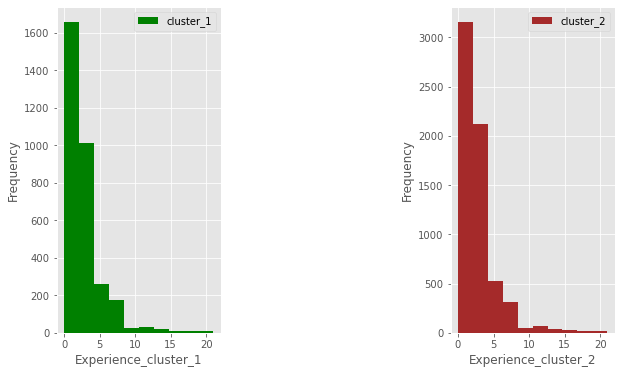

In [144]:
plt.figure(figsize=(10, 6))
plt.subplot(131)
ax = df_for_process.loc[labels==1,'Experience'].plot(kind='hist', color='green', label='cluster_1')
plt.legend()
plt.xlabel("Experience_cluster_1")
plt.subplot(133)
ax = df_for_process.loc[labels==0,'Experience'].plot(kind='hist', color='brown', label='cluster_2')
plt.xlabel("Experience_cluster_2")
plt.legend()

print("Interpretation")
print("Nous pouvons voir d'apès les deux figures, que la variable Expérience ")

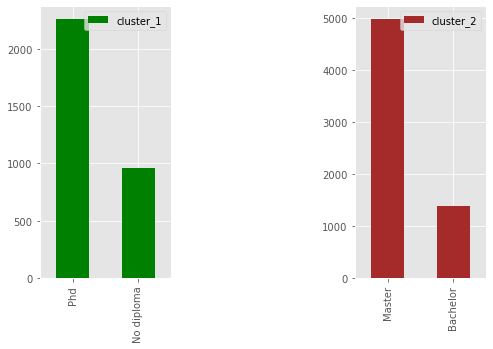

In [143]:
plt.figure(figsize=(8,5))
plt.subplot(131)
ax = df.loc[labels==1,'Diplome'].value_counts().plot(kind='bar', color='green', label='cluster_1')
plt.legend()
plt.subplot(133),
ax = df.loc[labels==0,'Diplome'].value_counts().plot(kind='bar', color='brown', label='cluster_2')
plt.legend()

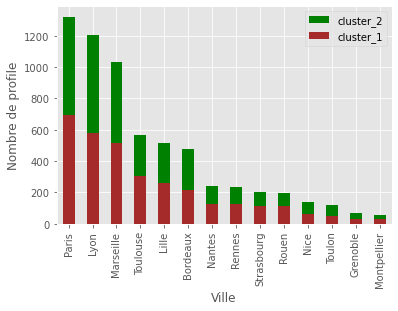

In [54]:
ax = df.loc[labels==0,'Ville'].value_counts().plot(kind='bar', color = 'green', label='cluster_2')
ax = df.loc[labels==1,'Ville'].value_counts().plot(kind='bar', color = 'brown', label='cluster_1')
plt.ylabel("Nombre de profile")
plt.xlabel("Ville")
plt.legend()

Text(0, 0.5, 'Nombre de profile')

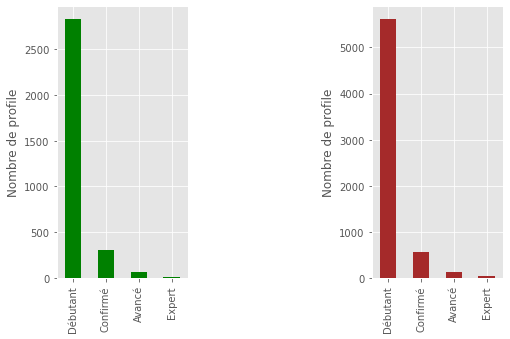

In [142]:
plt.figure(figsize=(8, 5))
plt.subplot(131)
ax=df.loc[labels==1,'Exp_label'].value_counts().plot(kind='bar', color='green', label='cluster_1')
plt.ylabel("Nombre de profile")
#plt.subplots_adjust(hspace=0.2)
plt.subplot(133)
ax=df.loc[labels==0,'Exp_label'].value_counts().plot(kind='bar', color='brown', label='cluster_2')
plt.ylabel("Nombre de profile")

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### Réponse

In [56]:
## Importation des librairies pour notre modèle de prédiction
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [57]:
print(f"Nous rappellons, que nous avons {df.Metier.isnull().sum()} métiers manquants")


Nous rappellons, que nous avons 19 métiers manquants


#### Pretraitement des données pour faire la prédiction 

In [59]:
# Condition, (mask) extrait les valeurs manquantes de la variables Metier.
cond_nan_metier = (df['Metier'].isna())

In [137]:
df_for_process.head()

,Experience,villes_encod,Technologies_encod,Diplome_encod,Exp_label_encod
0,1.000000,8,27,1,2
1,3.000000,4,34,1,2
2,3.000000,6,51,1,2
3,1.500000,4,2,1,2
4,2.243282,0,26,3,2


In [61]:
df_X = df_for_process.loc[~cond_nan_metier]

In [62]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9563 entries, 0 to 9581
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          9521 non-null   float64
 1   villes_encod        9563 non-null   int32  
 2   Technologies_encod  9563 non-null   int32  
 3   Diplome_encod       9563 non-null   int32  
 4   Exp_label_encod     9563 non-null   int32  
dtypes: float64(1), int32(4)
memory usage: 298.8 KB


In [63]:
y_cond = df.loc[~cond_nan_metier, 'Metier']

In [64]:
y = pd.Series(encoder_label.fit_transform(np.squeeze(y_cond)[:]), index = y_cond.index).astype(float)

In [65]:
### Encodage utilisé
# 2 data scientist
# 0 Data architecte
# 3 Lead data scientist
# 1 Data engineer
y.unique()

array([2., 0., 3., 1.])

array(['Data scientist', 'Data architecte', 'Lead data scientist', ...,
       'Data scientist', 'Data scientist', 'Data scientist'], dtype=object)

In [66]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 9563 entries, 0 to 9581
Series name: None
Non-Null Count  Dtype  
--------------  -----  
9563 non-null   float64
dtypes: float64(1)
memory usage: 149.4 KB


In [67]:
# X_ for predict
df_X_to_predict = df_for_process.loc[cond_nan_metier]

In [68]:
df_X_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 346 to 9490
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Experience          19 non-null     float64
 1   villes_encod        19 non-null     int32  
 2   Technologies_encod  19 non-null     int32  
 3   Diplome_encod       19 non-null     int32  
 4   Exp_label_encod     19 non-null     int32  
dtypes: float64(1), int32(4)
memory usage: 608.0 bytes


In [81]:
df_X['Experience'] = df_X['Experience'].fillna(df_X['Experience'].mean())

C:\Users\adnan\AppData\Local\Temp\ipykernel_43588\3102375117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Experience'] = df_X['Experience'].fillna(df_X['Experience'].mean())


In [72]:
# Training ........
X_knn = df_X

In [82]:
X_knn.head()

,Experience,villes_encod,Technologies_encod,Diplome_encod,Exp_label_encod
0,1.000000,8,27,1,2
1,3.000000,4,34,1,2
2,3.000000,6,51,1,2
3,1.500000,4,2,1,2
4,2.243282,0,26,3,2


In [85]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_knn,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [86]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_predict_0 = model_knn.predict(X_test)

In [95]:
print('Matrice de confusion :\n')
print(confusion_matrix(y_test, y_predict_0))

print('\nLe rapport de classificiation :\n')
print(classification_report(y_test, y_predict_0))

Matrice de confusion :

[[ 521   81   20    2]
 [  97  566   42    3]
 [  33   33 1006   94]
 [  14   24  181  152]]

Le rapport de classificiation :

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81       624
         1.0       0.80      0.80      0.80       708
         2.0       0.81      0.86      0.83      1166
         3.0       0.61      0.41      0.49       371

    accuracy                           0.78      2869
   macro avg       0.75      0.73      0.73      2869
weighted avg       0.77      0.78      0.78      2869



In [96]:
#model_knn.score()
print("La précision :"+str(accuracy_score(y_test, y_predict_0)*100)+' %')

La précision :78.25026141512723 %


In [98]:
y_predict = model_knn.predict(df_X_to_predict)

In [107]:
y_predict

array([1., 1., 2., 2., 1., 2., 2., 3., 1., 2., 0., 1., 0., 2., 1., 2., 0.,
       2., 2.])

In [112]:
y_predict_serie = pd.Series(encoder_label.inverse_transform(np.squeeze(y_predict.astype(int))[:]), index = df_X_to_predict.index)

In [114]:
print("Prediction des métiers manquants")
y_predict_serie

Prediction des métiers manquants


346           Data engineer
2058          Data engineer
2670         Data scientist
2899         Data scientist
3346          Data engineer
4248         Data scientist
4290         Data scientist
4292    Lead data scientist
5425          Data engineer
5593         Data scientist
5712        Data architecte
6024          Data engineer
6625        Data architecte
7091         Data scientist
7228          Data engineer
7330         Data scientist
9087        Data architecte
9427         Data scientist
9490         Data scientist
dtype: object